In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dados = pd.read_csv('Valorizacao_Ambiental.csv', sep=';')

In [6]:
dados.head(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [28]:
dados.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


<Axes: >

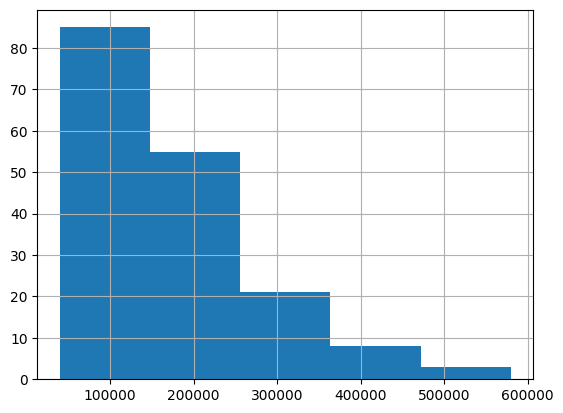

In [31]:
dados['Valor'].hist(bins=5)

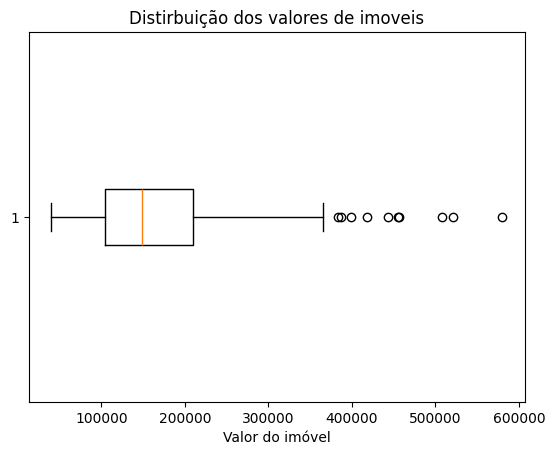

In [18]:
plt.boxplot(x='Valor', vert=False, data=dados)
plt.title('Distirbuição dos valores de imoveis')
plt.xlabel('Valor do imóvel')
plt.show()

In [22]:
dados.shape

(172, 10)

In [24]:
dados.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [27]:
dados[dados.duplicated()]

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m


In [32]:
dados['raiz_valor'] = np.sqrt(dados['Valor'])

In [35]:
dados.head().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.00
1,2,67000,129,1,6,0,0,1505,1,0,258.84
2,3,190000,218,1,8,1,0,251,0,1,435.89
3,4,110000,180,12,4,1,0,245,0,0,331.66
4,5,70000,120,15,3,1,0,956,1,0,264.58


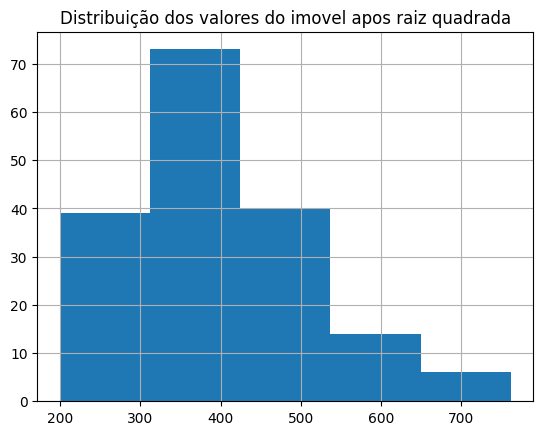

In [37]:
dados['raiz_valor'].hist(bins=5)
plt.title('Distribuição dos valores do imovel apos raiz quadrada')
plt.show()

In [42]:
fig = dados.bloxplot(column='Valor')

AttributeError: 'DataFrame' object has no attribute 'bloxplot'

Text(0, 0.5, 'Qtd de Suites')

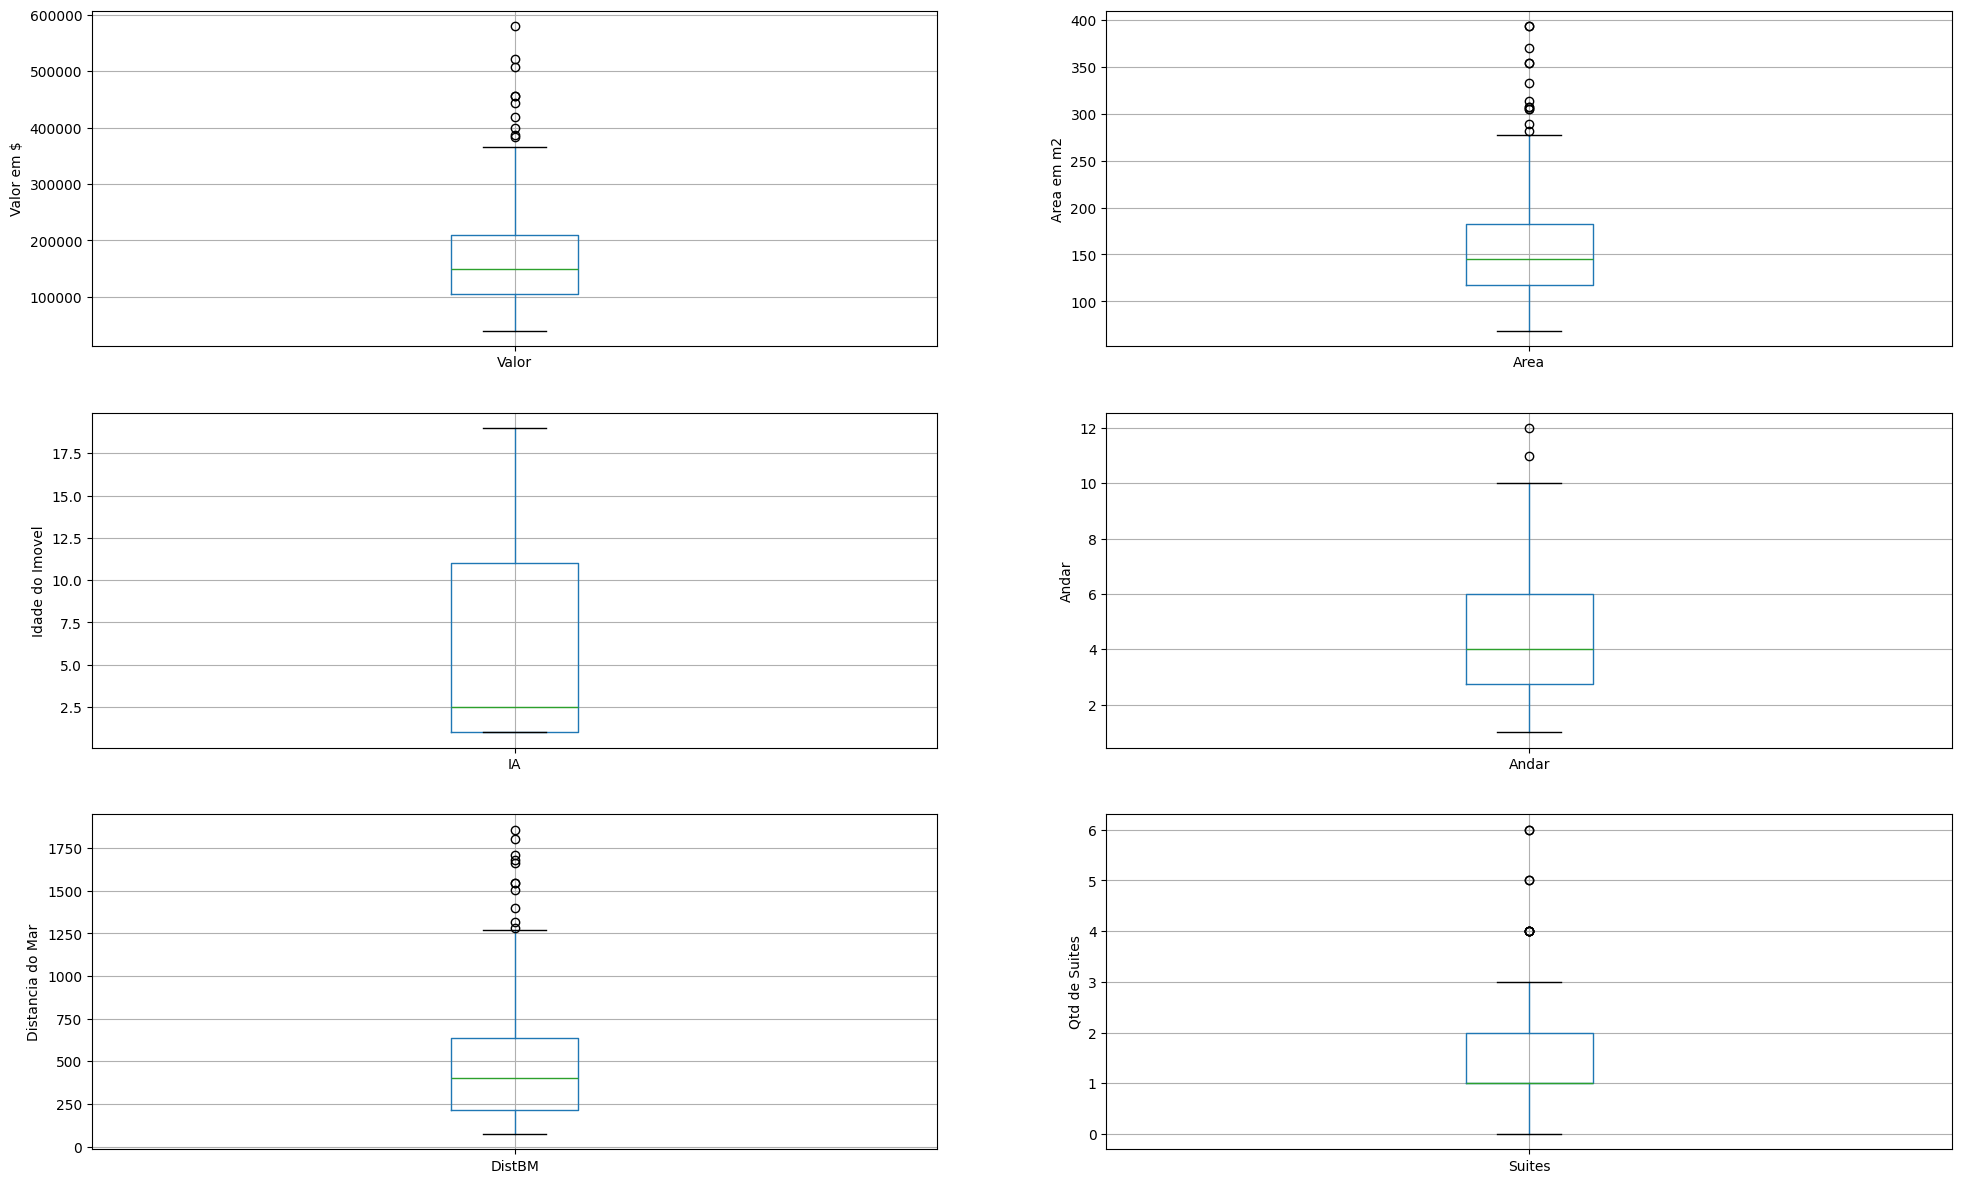

In [43]:
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = dados.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em $')

plt.subplot(4,2,2)
fig = dados.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em m2')

plt.subplot(4,2,3)
fig = dados.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('Idade do Imovel')

plt.subplot(4,2,4)
fig = dados.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4,2,5)
fig = dados.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('Distancia do Mar')

plt.subplot(4,2,6)
fig = dados.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Qtd de Suites')


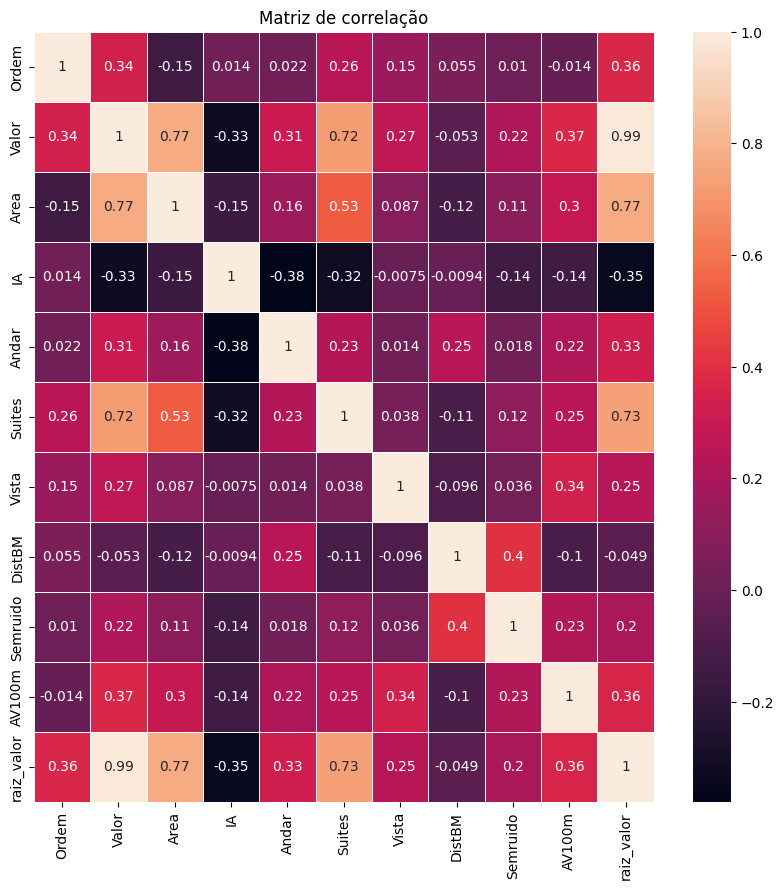

In [53]:
correlacao_dados = dados.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlacao_dados, annot=True, linewidths=.5, ax=ax)
plt.title('Matriz de correlação')
plt.show()

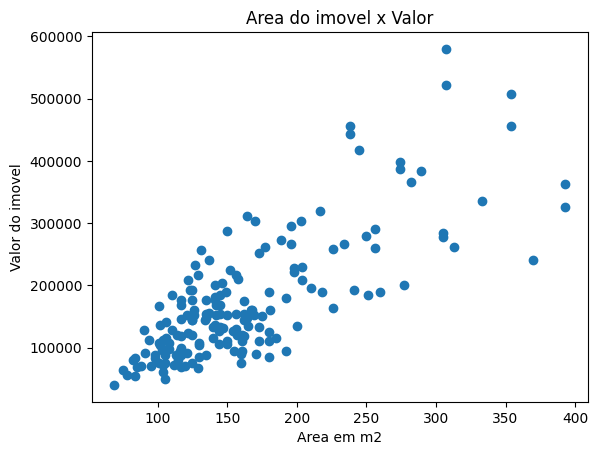

In [54]:
plt.scatter("Area", "Valor", data=dados)
plt.xlabel("Area em m2")
plt.ylabel("Valor do imovel")
plt.title('Area do imovel x Valor')
plt.show()

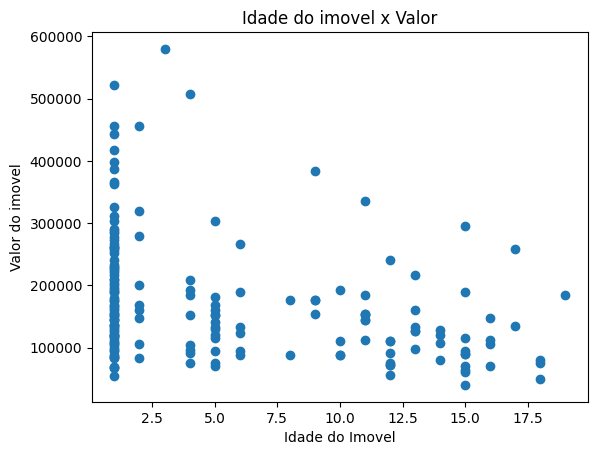

In [56]:
plt.scatter("IA", "Valor", data=dados)
plt.xlabel("Idade do Imovel")
plt.ylabel("Valor do imovel")
plt.title('Idade do imovel x Valor')
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_41380\681280920.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Vista', y='Valor', data=dados, palette='hls')


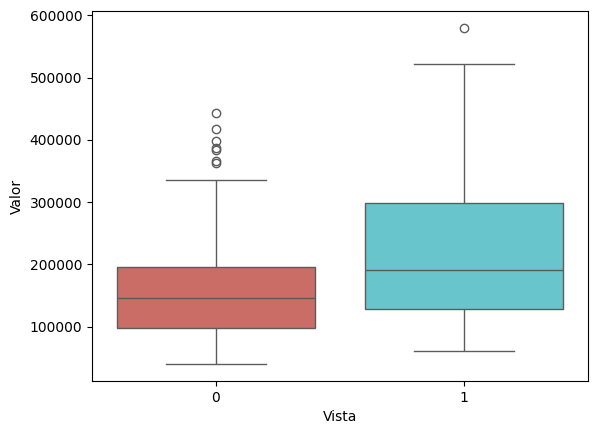

In [60]:
sns.boxplot(x='Vista', y='Valor', data=dados, palette='hls')
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_41380\1770163347.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Semruido', y='Valor', data=dados, palette='hls')


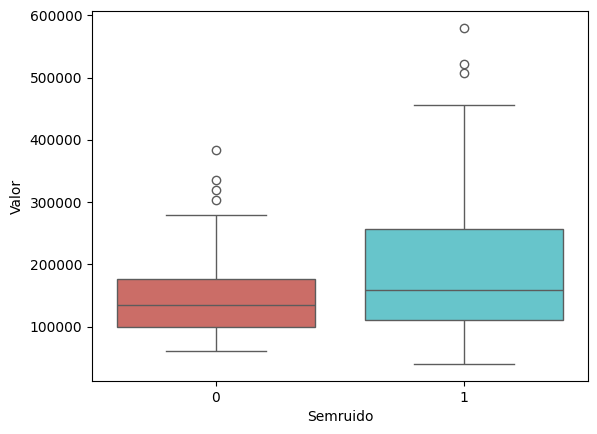

In [61]:
sns.boxplot(x='Semruido', y='Valor', data=dados, palette='hls')
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_41380\343699424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AV100m', y='Valor', data=dados, palette='hls')


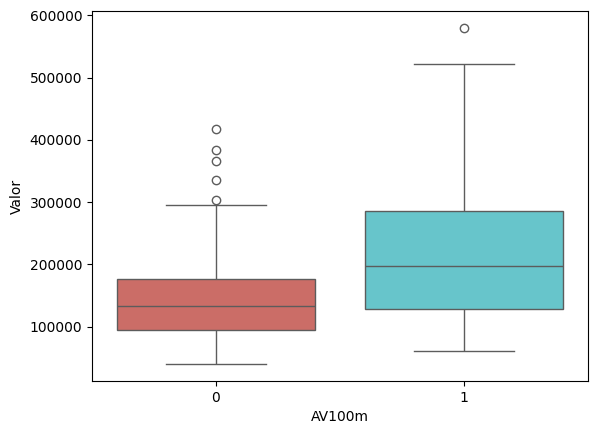

In [63]:
sns.boxplot(x='AV100m', y='Valor', data=dados, palette='hls')
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



In [65]:
dados.columns

Index(['Ordem', 'Valor', 'Area', 'IA', 'Andar', 'Suites', 'Vista', 'DistBM',
       'Semruido', 'AV100m', 'raiz_valor'],
      dtype='object')

In [67]:
#x contem as variaveis preditoras ou independentes
x = dados[['Area', 'IA', 'Andar', 'Suites', 'Vista', 'DistBM', 'Semruido', 'AV100m']]

#y contem a variavel target ou dependente
y = dados['Valor']

In [68]:
from sklearn.model_selection import train_test_split

# seprando os dados de treino e teste

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=101)

In [69]:
#treinando o modeolo
lr.fit(x_train, y_train)

LinearRegression()

In [70]:
#calculando o valor predito da variavel resposta da amostra teste
y_pred = lr.predict(x_test)

In [72]:
#Primeiro, vamos olhar o intercepto e os coeficientes  da regressao
# representa  o valor esperado da variavel dependente quando todas as variaveis independentes são iguais:
# em termos graficos, o intercepto é o ponto onde a linha da regressão cruza o eixo vertical (eixo y)

print('intercepto:', lr.intercept_)

intercepto: -40165.875277303014


In [73]:
# Os coeficientes  de regressão linear  representam as inclinações da linha de regressão para cada variavel

coeficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coeficients

,0,0
0,Area,815.218075
1,IA,-1052.417100
2,Andar,5635.237485
3,Suites,34315.785459
4,Vista,63486.030935
5,DistBM,-2.522530
6,Semruido,17027.508944
7,AV100m,-5672.535051


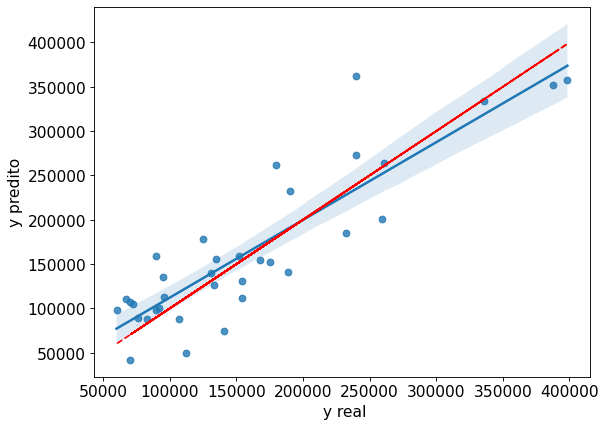

In [74]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size':14})
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel=' y real', ylabel='y predito')
ax = plt.plot(y_test,y_test, '--r')

plt.show()

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [76]:
#avaliando modelo
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [77]:
print('MAE: ', MAE)
print('MSE: ', MSE)
print('r2: ', r2)


MAE:  34422.98857094562
MSE:  1844288772.1789987
r2:  0.7584591969125017


# Avaliando modelo DecisionTreeRegressor

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
#criando o modelo decisiontreeregressor

In [80]:
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=101)

In [81]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [82]:
#Avaliando modelo
#avaliando modelo
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('r2: ', r2)

MAE:  45027.4081632653
MSE:  3229877008.3562684
r2:  0.5769929860005125


# Avaliando com SVR

In [83]:
from sklearn.svm import SVR

In [84]:
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [85]:
x_pred_svr = svr.predict(x_test)

In [86]:
#Avaliando modelo
#avaliando modelo
MAE = mean_absolute_error(y_test, x_pred_svr)
MSE = mean_squared_error(y_test, x_pred_svr)
r2 = r2_score(y_test, x_pred_svr)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('r2: ', r2)

MAE:  43153.53918496288
MSE:  3123421996.7782364
r2:  0.5909350700044546


__Decisão__ = O melhor modelo foi o de regressao linear